<a href="https://colab.research.google.com/github/JaiderSantos/metodos1_JaiderSantos_NicolasGomez/blob/main/Parcial2/Parcial_2_parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sympy as sy

#Punto 24

In [76]:
def PuntosyPesos(n):
  return np.polynomial.legendre.leggauss(n)

N = 50
k = 1.9429303960
R = 1
#Asumir sigma como 1
sigma = 1
x, y, z = 0., 0., 0.2
#Calculo de pesos y puntos phi
phi_points, phi_weights = PuntosyPesos(N)
#calculo de puntos y pesos radiales
r_points, r_weights = PuntosyPesos(N)

# Transformación de los puntos de Gauss-Legendre al intervalo [0, R] para r
r_points_transformed = 0.5 * R * (r_points + 1)
r_weights_transformed = 0.5 * R * r_weights

# Transformación de los puntos de Gauss-Legendre al intervalo [0, 2pi] para phi
phi_points_transformed = np.pi * (phi_points + 1)
phi_weights_transformed = np.pi * phi_weights


Los puntos y pesos están pensados para usar por defecto en el intervalo de
(-1,1), para adaptarlos a los limites de integración deseados
Para r y phi es:
##Puntos
$$r_i=\frac{b-a}{2}t_i+\frac{b+a}{2}$$
donde $t_i$ son los puntos estandar, los que estan adecuados para el intervalo $(-1, 1)$
##Pesos
$$w'_i = \frac{b-a}{2}w_i$$

Donde al igual que antes; $w_i$ son los pesos por defecto, despejando queda la transformación aplicada en el codigo

In [83]:
# Función a integrar (simplificar y reemplazar ceros)
def integrando(r, z):
    denominador = (z**2)**(3/2)
    return (r * z) / denominador

#resultado en 0
gk_total = 0



# Integración utilizando los puntos y pesos transformados
for i in range(N):
    for j in range(N):
        r = r_points_transformed[j]
        phi = phi_points_transformed[i]


        gk_total += r_weights_transformed[j] * phi_weights_transformed[i] * integrando(r, z)


gk_total *= -k


print(gk_total)


-152.59739646274772


#Punto 25

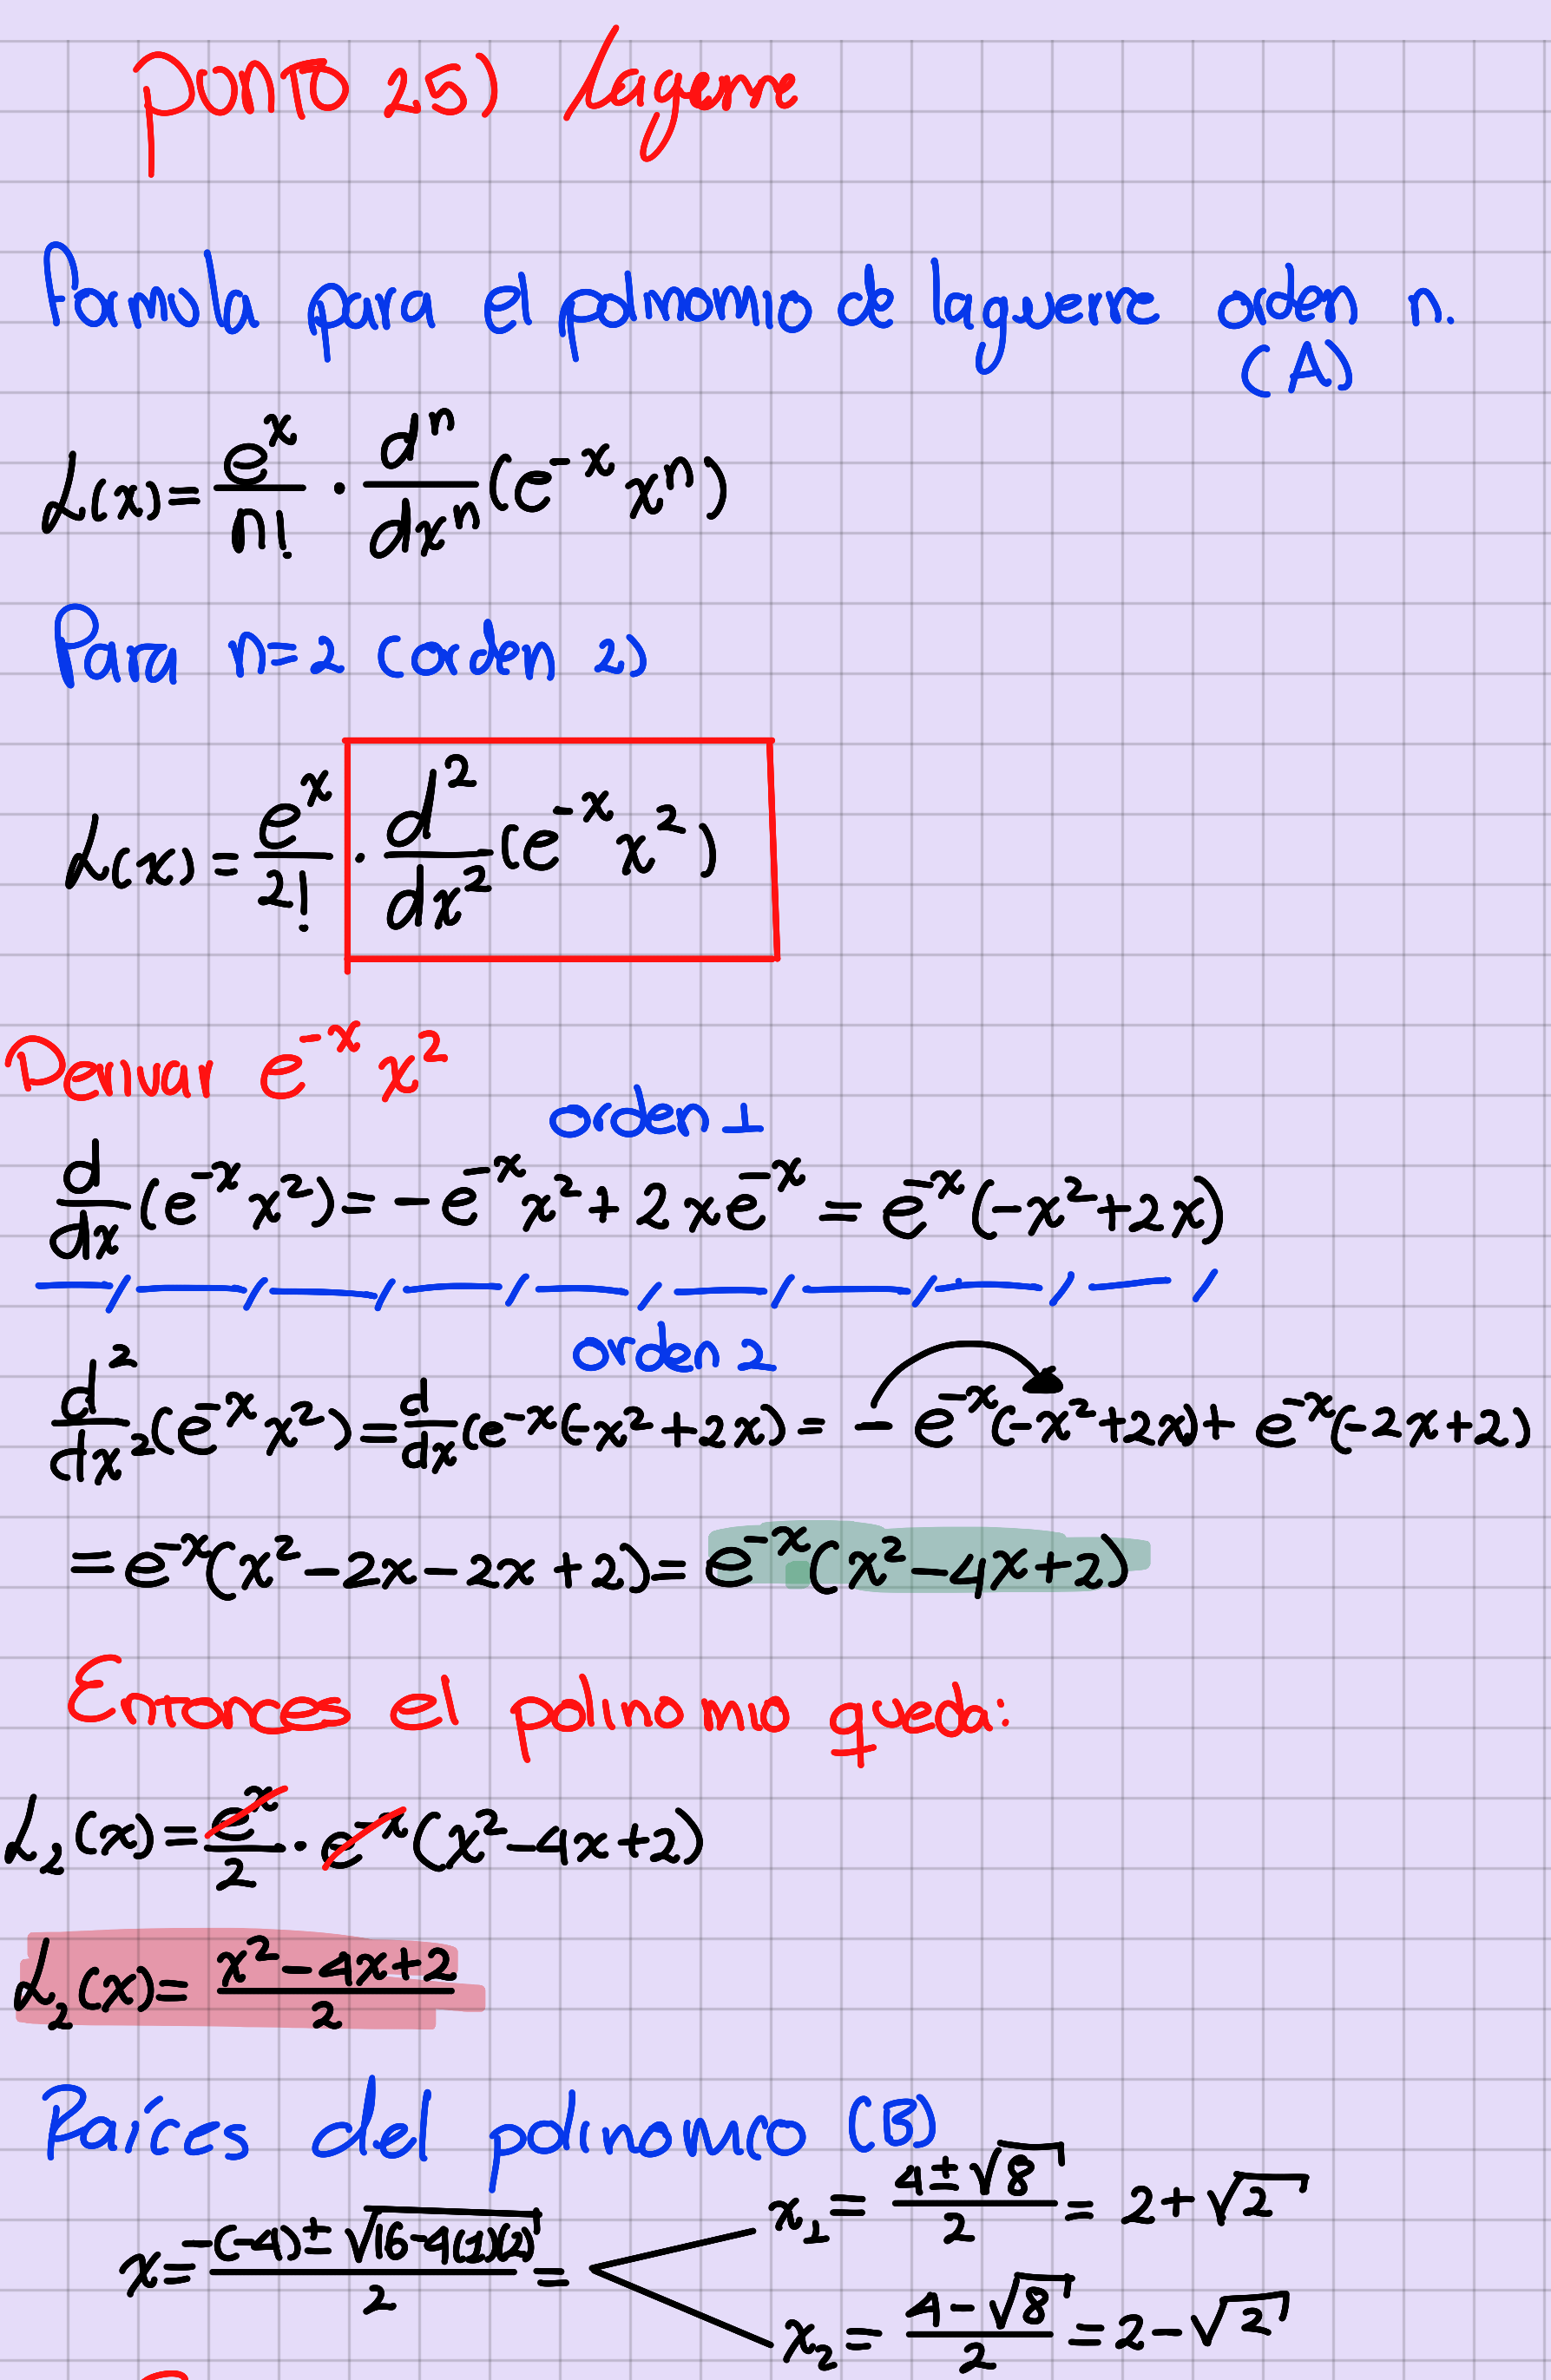

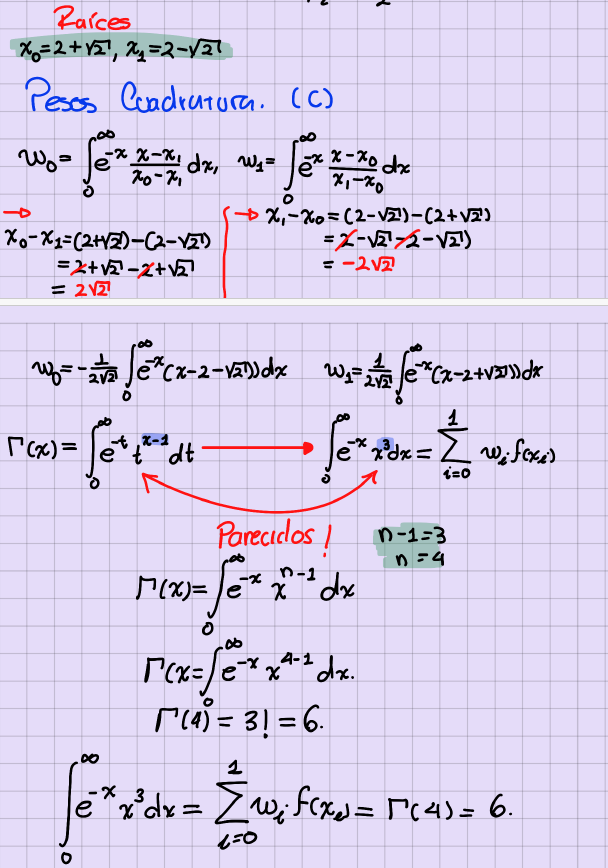

#Punto 26 (teórico)

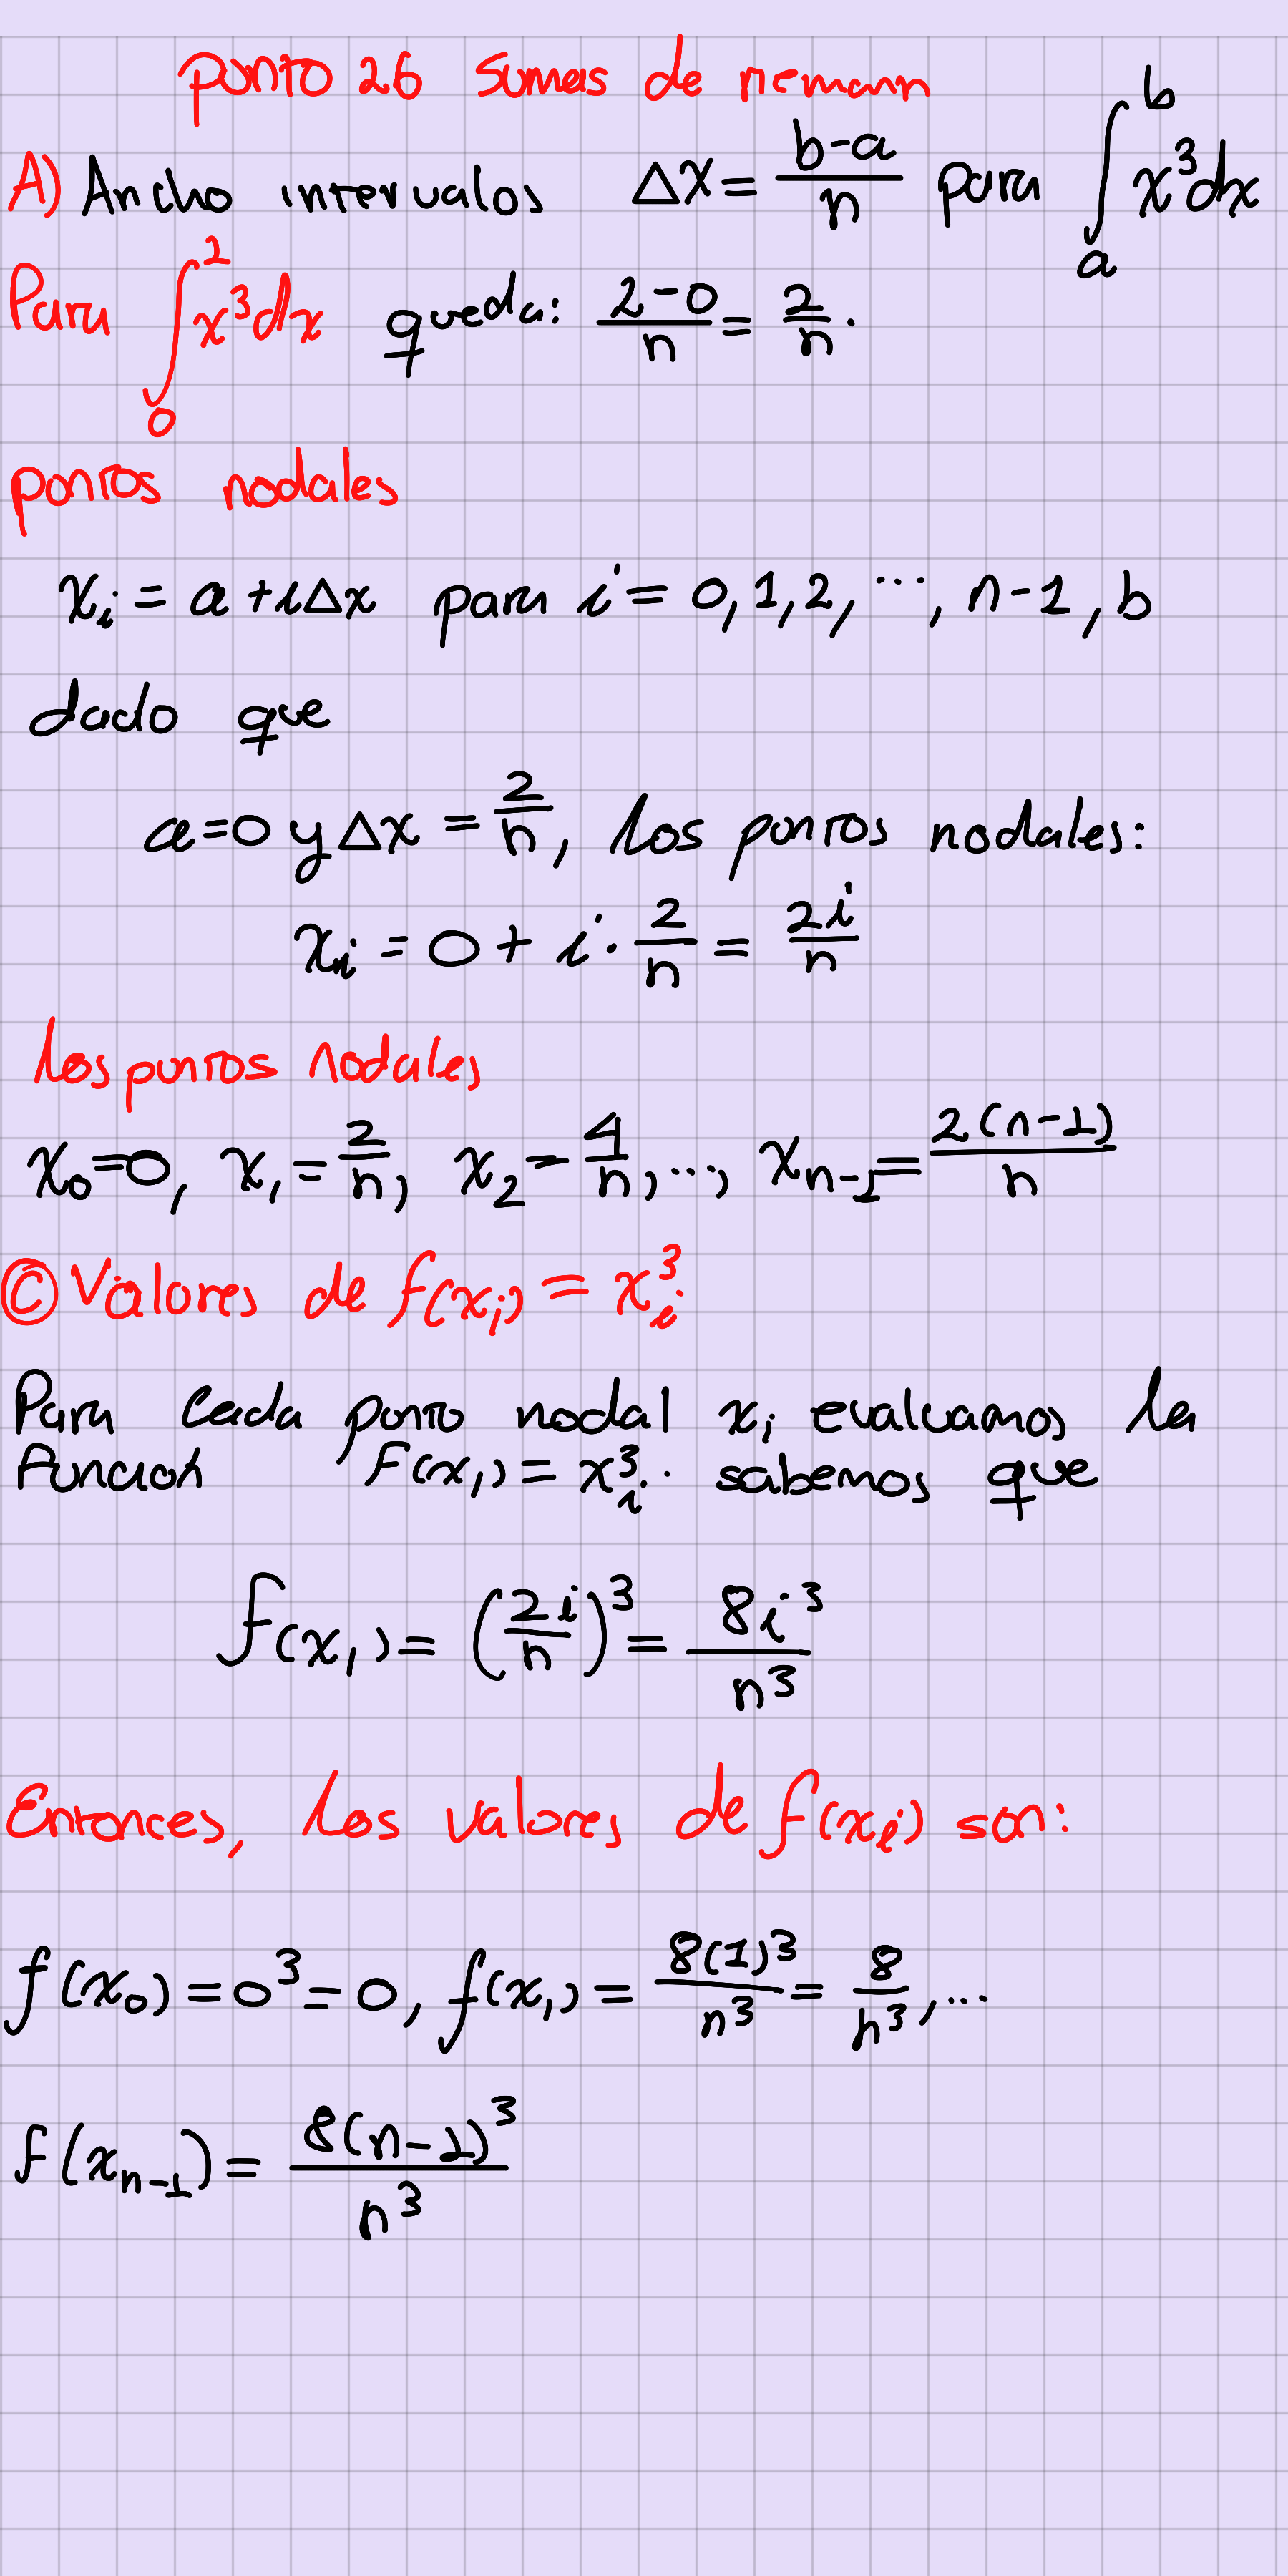

 ![image.png](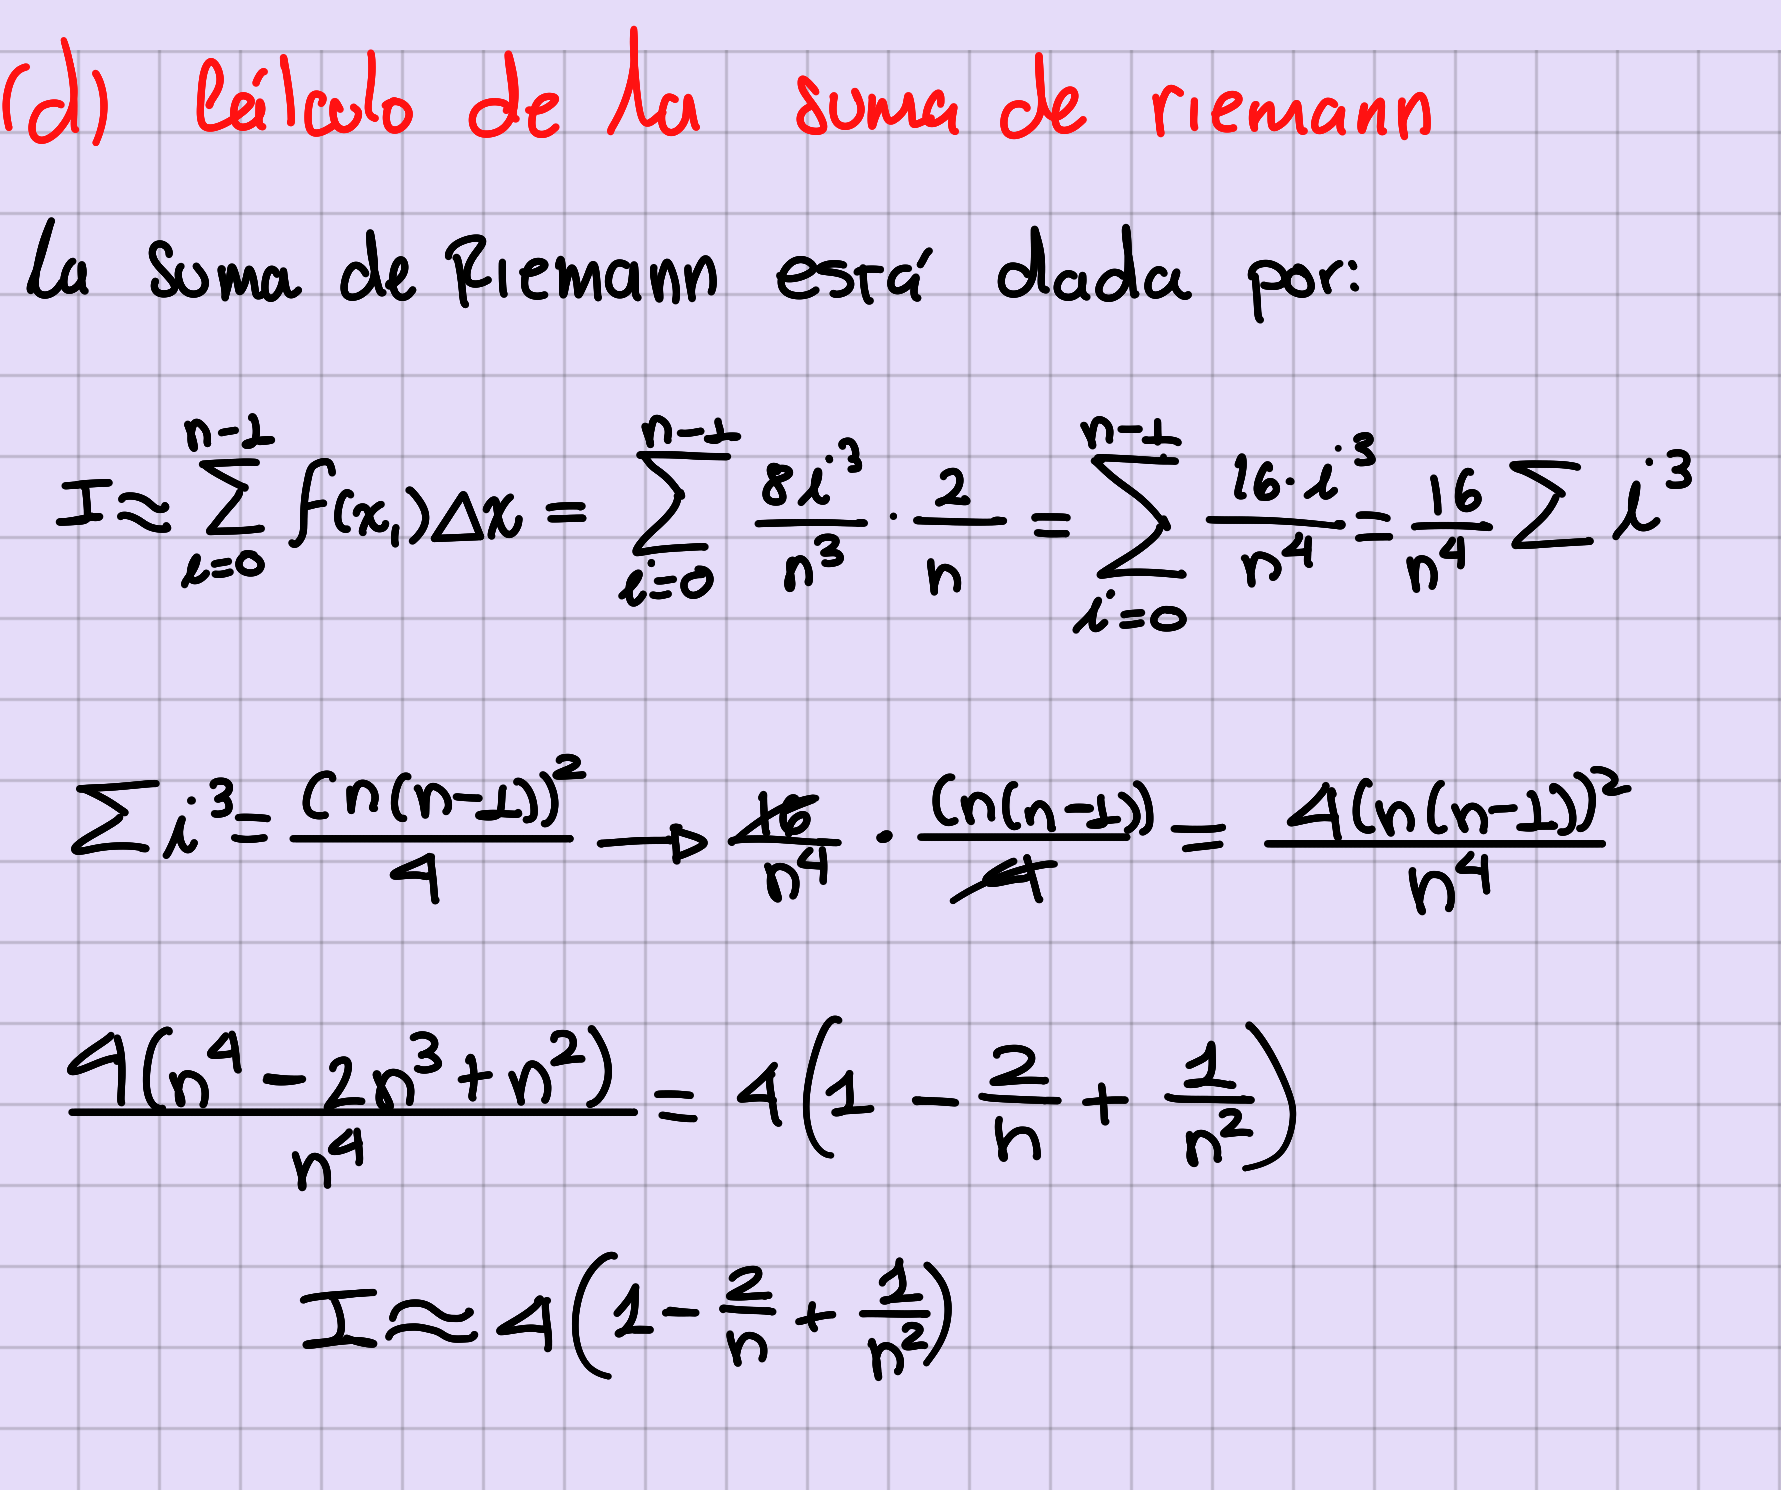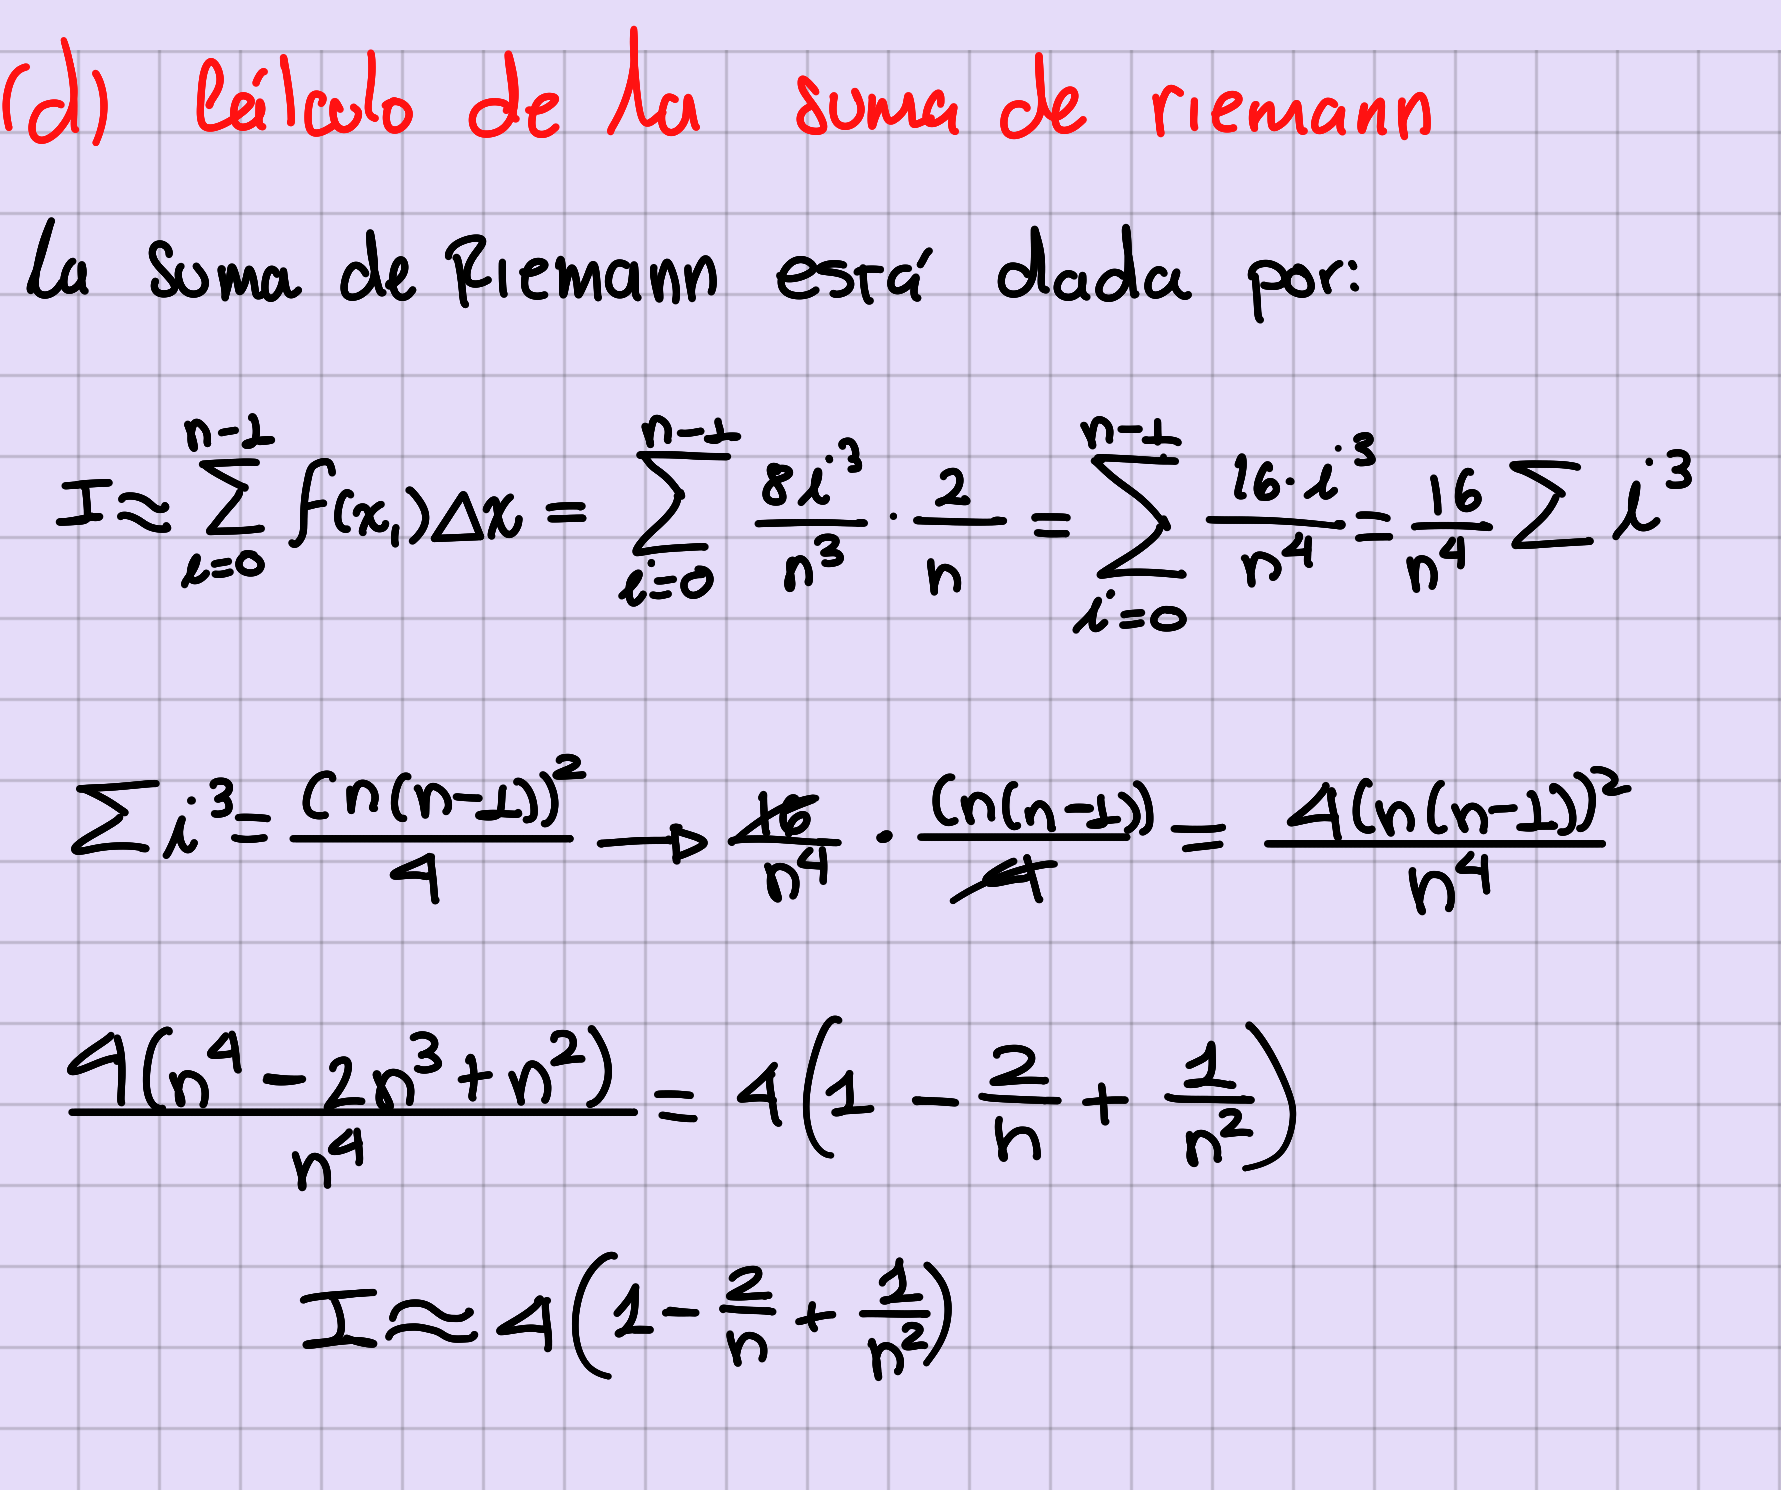)

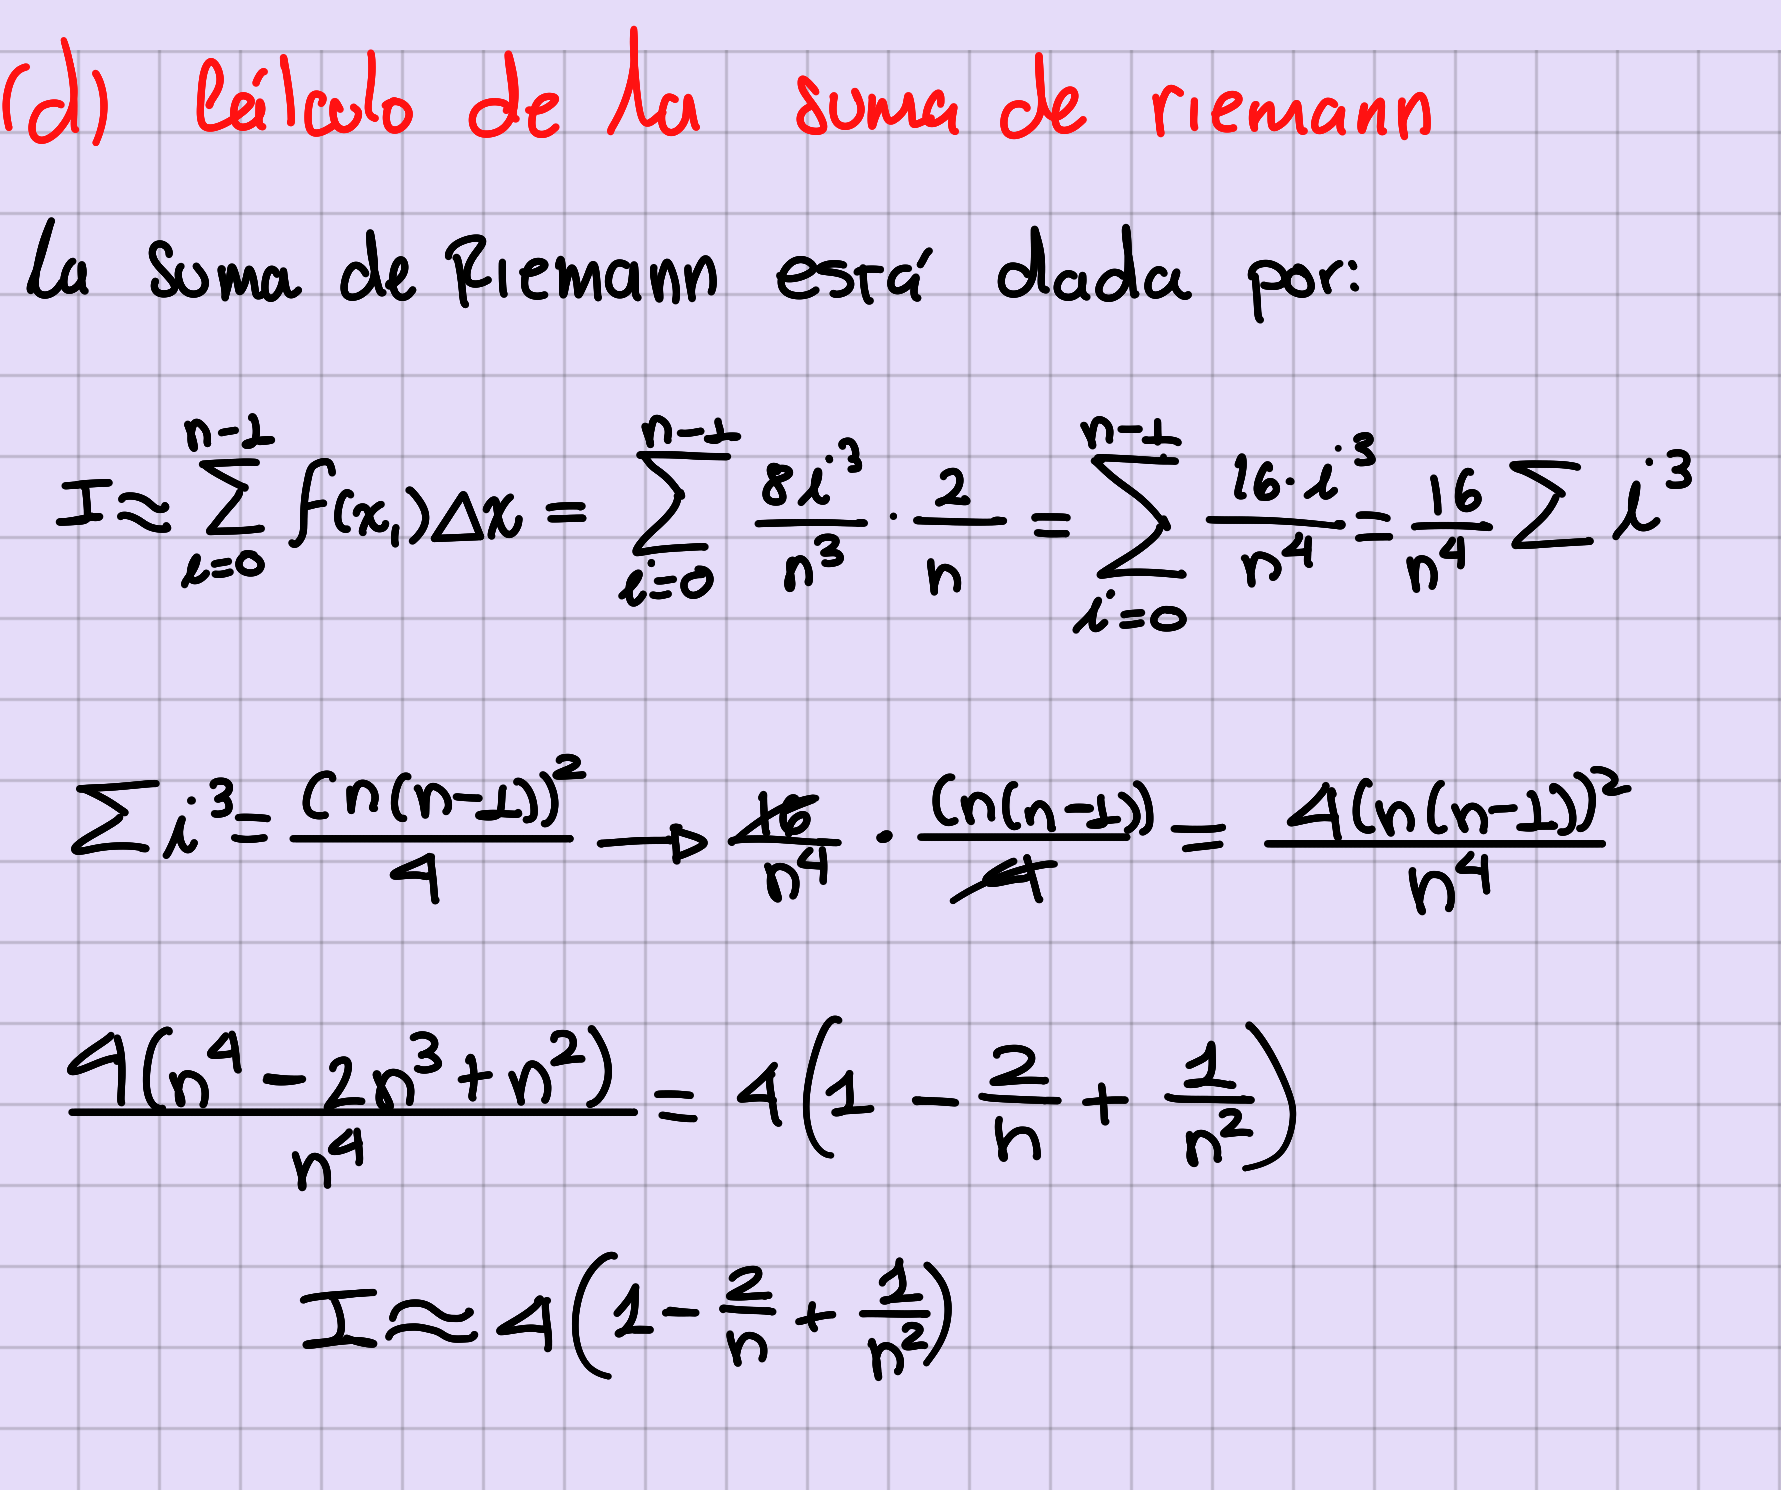

#Punto 26 (Código)

Partiendo de la demostración anterior, La estimación de la integral de $$x^3$$ en el intervalo (0,2) es: $$I=4(1-\frac{2}{n}+\frac{1}{n^2})$$

In [ ]:
n = 30
def aprox_integral(n):
  return 4*(1-(2/n)+(1/n**2))
def valor_exacto_integral(a,b):
  return (b**4)/4 - (a**4)/4
print("valor de la exacta:")
print(valor_exacto_integral(0,2))
print("valor de la aproximación:")
print(aprox_integral(n))
n_values = np.linspace(30,400,100, endpoint = False)
aprox_values = aprox_integral(n_values)
#valor teórico
plt.axhline(y=4, color="r", label="Valor teórico")
#valor aprox}
plt.plot(n_values, aprox_values, color="y", label="Valores para n")

In [ ]:
#Error
def error(aprox_values):
  return np.abs(4 - aprox_values)

error_values = error(aprox_values)

plt.scatter(n_values, error_values, label= "Error vs Valores de n")

Consideramos que depende, y depende del caso, en caso tal de que quieras una cifra de error extremadamente pequeña, consideramos que conviene más hacerlo por otras cuadraturas, mientras que para casos en los que la exigencia de exactitud no sea demaciado demandante si es un buen metodo para proximar llegando a un error de menos del 1%.

#Punto 27

$$\int_{-1}^{1} 1 \, dx = w_0 + w_1 + w_2 + w_3 = 2$$

$$\int_{-1}^{1} x \, dx = w_0 x_0 + w_1 x_1 + w_2 x_2 + w_3 x_3 = 0$$

$$\int_{-1}^{1} x^2 \, dx = w_0 x_0^2 + w_1 x_1^2 + w_2 x_2^2 + w_3 x_3^2 = \frac{2}{3}$$

$$\int_{-1}^{1} x^3 \, dx = w_0 x_0^3 + w_1 x_1^3 + w_2 x_2^3 + w_3 x_3^3 = 0$$

$$\int_{-1}^{1} x^4 \, dx = w_0 x_0^4 + w_1 x_1^4 + w_2 x_2^4 + w_3 x_3^4 = \frac{2}{5}$$

$$\int_{-1}^{1} x^5 \, dx = w_0 x_0^5 + w_1 x_1^5 + w_2 x_2^5 + w_3 x_3^5 = 0$$

$$\int_{-1}^{1} x^6 \, dx = w_0 x_0^6 + w_1 x_1^6 + w_2 x_2^6 + w_3 x_3^6 = \frac{2}{7}$$

$$\int_{-1}^{1} x^7 \, dx = w_0 x_0^7 + w_1 x_1^7 + w_2 x_2^7 + w_3 x_3^7 = 0$$

In [ ]:

F = (
    lambda x0, x1, x2, x3, w0, w1, w2, w3: w0 + w1 + w2 + w3 - 2,  # Primera ecuación
    lambda x0, x1, x2, x3, w0, w1, w2, w3: w0*x0 + w1*x1 + w2*x2 + w3*x3,  # Segunda ecuación
    lambda x0, x1, x2, x3, w0, w1, w2, w3: w0*x0**2 + w1*x1**2 + w2*x2**2 + w3*x3**2 - 2/3,  # Tercera ecuación
    lambda x0, x1, x2, x3, w0, w1, w2, w3: w0*x0**3 + w1*x1**3 + w2*x2**3 + w3*x3**3,  # Cuarta ecuación
    lambda x0, x1, x2, x3, w0, w1, w2, w3: w0*x0**4 + w1*x1**4 + w2*x2**4 + w3*x3**4 - 2/5,  # Quinta ecuación
    lambda x0, x1, x2, x3, w0, w1, w2, w3: w0*x0**5 + w1*x1**5 + w2*x2**5 + w3*x3**5,  # Sexta ecuación
    lambda x0, x1, x2, x3, w0, w1, w2, w3: w0*x0**6 + w1*x1**6 + w2*x2**6 + w3*x3**6 - 2/7,  # Séptima ecuación
    lambda x0, x1, x2, x3, w0, w1, w2, w3: w0*x0**7 + w1*x1**7 + w2*x2**7 + w3*x3**7  # Octava ecuación
)

# Definir las variables iniciales (puntos y pesos) como un vector de 8 componentes
variables_iniciales = np.random.uniform(-1, 1, 8)  # Inicializar con valores aleatorios

# Evaluar todas las funciones para un conjunto de variables dado
resultados = [f(*variables_iniciales) for f in F]
print(resultados)

In [ ]:
def jacobian(F, variables, h=1e-6):
    n = len(variables)
    jac = np.zeros((n, n))
    for i in range(n):
        perturbed = np.copy(variables)
        perturbed[i] += h
        f_plus = np.array([f(*perturbed) for f in F])

        perturbed[i] -= 2 * h
        f_minus = np.array([f(*perturbed) for f in F])

        jac[:, i] = (f_plus - f_minus) / (2 * h)
    return jac

In [ ]:
def evaluate_system(F, variables):
    return np.array([f(*variables) for f in F])

def gradient_descent(F, initial_variables, learning_rate=0.01, tolerance=1e-5, max_iters=10000):
    variables = np.copy(initial_variables)
    for iteration in range(max_iters):

        f_values = evaluate_system(F, variables)


        error = np.linalg.norm(f_values)
        if error < tolerance:
            print(f'Solución encontrada en la iteración {iteration}, error = {error}')
            return variables

        # Calcular el Jacobiano
        jac = jacobian(F, variables)


        variables -= learning_rate * np.linalg.solve(jac, f_values)

        #error es menor a 0.005
        if error < 0.005:
            learning_rate = 0.001
    print(f'Solución no encontrada después de {max_iters} iteraciones, error final = {error}')
    return variables

In [ ]:
#Variables iniciales aleatorias (en el intervalo [-1, 1])
variables_iniciales = np.random.uniform(-1, 1, 8)

# Aplicar el método de descenso del gradiente
solucion = gradient_descent(F, variables_iniciales)

print(f'Solución: {solucion}')

In [ ]:
#Encontrar la Integral de coseno entre -1 y 1
def funcion(x):
  return np.cos(x)
#Puntos
ceros = solucion[:4]
#Evaluar
cosenos = funcion(ceros)
#pesos
pesos = solucion[4:8]
#Integral
I = pesos@cosenos
print(I)

#¿Por qué es tan inexacto?
Para accionar el algoritmo es necesario dotarlo de una semilla (Un punto de spawn) aleatoria dicha semilla entre -1 y 1 va a comenzar a moverse hacia los atractores cercanos que principalmente serán las soluciones del sistema.

El hecho de que sea tan inexacto puede ser debido a que:


1.   El hecho de que aparezca en distintos puntos y que haya una cantidad finita de iteraciones hará que no se llegue necesariamente al mismo valor en $$R^8$$
2.   La otra razon es que la cuadratura de gauss es exacta pero para polinomios de $$2N-1$$ siendo N el numero de puntos, siendo de 4 puntos, ésta solo sería exacta para polinomios de septimo grado, mientras que Cos(x) es una funcion trigonométrica y no polinomial por lo que en cualquier caso se aproximaría.

